<a href="https://colab.research.google.com/github/hishaam19/RockID/blob/TrainingModelsAlex/Xeception80%25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import keras
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os
from keras import layers
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D,regularization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras import regularizers
import seaborn as sns
print(tf. __version__)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

2.12.0


In [ ]:
img_width=299
img_height=299
batch_size=45
num_of_classes=17

TRAIN_DIR= "/kaggle/input/rockid/geomstonesExtra/train"
TEST_DIR= "/kaggle/input/rockid/geomstonesExtra/test"
VAL_DIR = "/kaggle/input/rockid/geomstonesExtra/val"

In [ ]:
#preprocessing datasets
train_data = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=False,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    vertical_flip=False  )


val_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

train_gen = train_data.flow_from_directory(TRAIN_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                target_size=(img_height, img_width))


val_gen = val_data.flow_from_directory(VAL_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                target_size=(img_height, img_width))

test_gen = test_data.flow_from_directory(TEST_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                target_size=(img_height, img_width))


"""val_gen=tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,

)
test_gen=tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,

)"""

Found 7143 images belonging to 74 classes.
Found 2024 images belonging to 74 classes.
Found 1090 images belonging to 74 classes.


"val_gen=tf.keras.utils.image_dataset_from_directory(\n    VAL_DIR,\n    label_mode='categorical',\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n\n)\ntest_gen=tf.keras.utils.image_dataset_from_directory(\n    TEST_DIR,\n    label_mode='categorical',\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n\n)"

In [ ]:
model=Sequential()
pretrained_model=tf.keras.applications.Xception(include_top=False,
              weights='imagenet',
              input_shape=(img_height,img_width,3),pooling='max')
for layer in pretrained_model.layers:
  layer.trainable = True


#model.add(Dense(512,bias_regularizer='l1_l2',kernel_regularizer='l1_l2',activity_regularizer='l1_l2',activation='relu'))
model.add(pretrained_model)
#model.add(BatchNormalization())
#model.add(Flatten())
#model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(74, activation='softmax'))

"""model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(74, activation='softmax'))"""


model.compile(optimizer=Adam(learning_rate=0.00001),
      loss='categorical_crossentropy',
      metrics =['accuracy'])

model.summary()

83683744/83683744 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 74)                37962     
                                                         

In [ ]:
ModelCallbacks = [EarlyStopping(monitor='val_loss', patience=5,  restore_best_weights=True)]

history = model.fit(train_gen,epochs=20,verbose=1,validation_data=val_gen,callbacks=ModelCallbacks )

Epoch 1/20
159/159 [==============================] - 261s 2s/step - loss: 3.2643 - accuracy: 0.9901 - val_loss: 4.1092 - val_accuracy: 0.7994
Epoch 2/20
159/159 [==============================] - 259s 2s/step - loss: 3.1613 - accuracy: 0.9896 - val_loss: 3.9914 - val_accuracy: 0.8034
Epoch 3/20
159/159 [==============================] - 259s 2s/step - loss: 3.0542 - accuracy: 0.9924 - val_loss: 3.8894 - val_accuracy: 0.8058
Epoch 4/20
159/159 [==============================] - 262s 2s/step - loss: 2.9595 - accuracy: 0.9922 - val_loss: 3.7849 - val_accuracy: 0.8039
Epoch 5/20
159/159 [==============================] - 272s 2s/step - loss: 2.8591 - accuracy: 0.9929 - val_loss: 3.6877 - val_accuracy: 0.8048
Epoch 6/20
159/159 [==============================] - 267s 2s/step - loss: 2.7612 - accuracy: 0.9941 - val_loss: 3.6133 - val_accuracy: 0.8019
Epoch 7/20
159/159 [==============================] - 260s 2s/step - loss: 2.6686 - accuracy: 0.9927 - val_loss: 3.5177 - val_accuracy: 0.8019

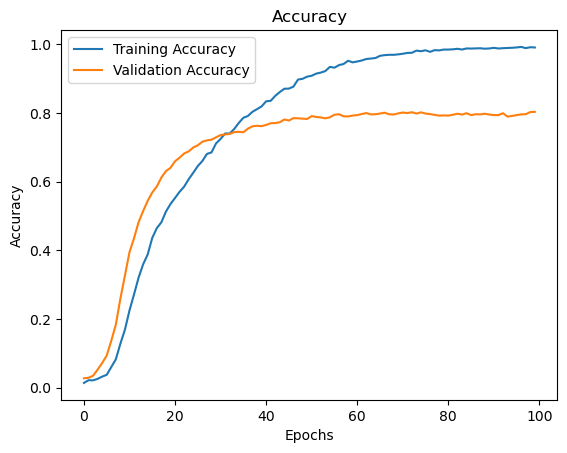

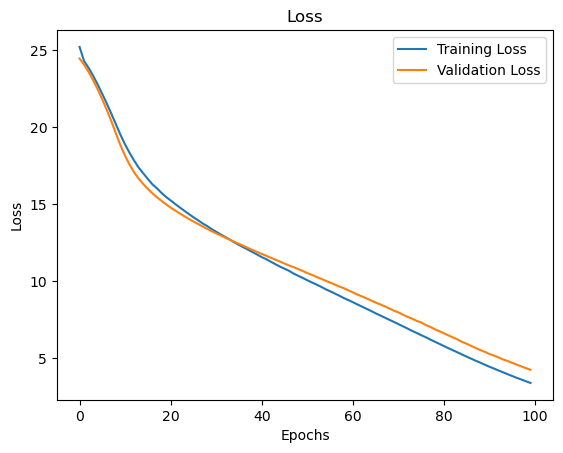

In [ ]:
#Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Evaluate test data
25/25 [==============================] - 13s 503ms/step - loss: 4.1583 - accuracy: 0.8046
Test Loss: 4.158324241638184
Test Accuracy: 0.804587185382843


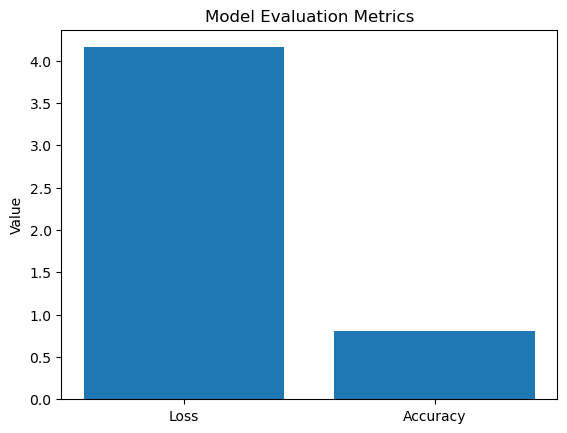

In [ ]:
print("Evaluate test data")
#Save model
#tf.keras.saving.save_model("/content/sample_data/")


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_gen)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Plot the evaluation metrics
metrics = ['Loss', 'Accuracy']
values = [test_loss, test_accuracy]

plt.bar(metrics, values)
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
plt.show()

In [ ]:
model.save('gem80%1.h5')
# Compute the confusion matrix

"""num_classes = val_gen.num_classes
y_train_true = val_gen.classes
y_train_pred_probs = model.predict(val_gen)
y_train_pred_classes = np.argmax(y_train_pred_probs, axis=1)

train_cm = confusion_matrix(y_train_true, y_train_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()"""

'num_classes = val_gen.num_classes\ny_train_true = val_gen.classes\ny_train_pred_probs = model.predict(val_gen)\ny_train_pred_classes = np.argmax(y_train_pred_probs, axis=1)\n\ntrain_cm = confusion_matrix(y_train_true, y_train_pred_classes)\n\n# Plot the confusion matrix as a heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False)\nplt.title("Validation Confusion Matrix")\nplt.xlabel("Predicted Labels")\nplt.ylabel("True Labels")\nplt.show()'

In [ ]:
classes=['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst','Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green',
         'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Cats Eye',
         'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine',
         'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite',
         'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli',
         'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Opal', 'Pearl', 'Peridot',
         'Pyrite', 'Pyrope', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire Blue',
         'Sapphire Pink', 'Sapphire Purple', 'Sapphire Yellow', 'Serpentine', 'Sodalite', 'Spessartite',
         'Sphene', 'Spinel', 'Sunstone', 'Tanzanite', 'Tigers Eye', 'Topaz', 'Tourmaline', 'Tsavorite',
         'Turquoise', 'Variscite', 'Zircon', 'Zoisite']


label_dict = train_gen.class_indices
#print(label_dict)
img = tf.keras.preprocessing.image.load_img('/content/geomstonesExtra/test/Amber/Amber__22.jpg', target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
img_array = tf.expand_dims(img_array, axis=0)
#preprocessed_img = preprocess_input(img_array)
predictions = model.predict(img_array)
print(predictions)
max_index = np.argmax(predictions)
print("Maximum index:", max_index)
print("The model is predicting this rock as:",classes[max_index])